Wasp 121. There is a lot of archival data (transit obs) but it may be quite bad. We have G140L data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m97050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m98050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/od9m99030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/was

(1e-17, 1.748718222312521e-12)

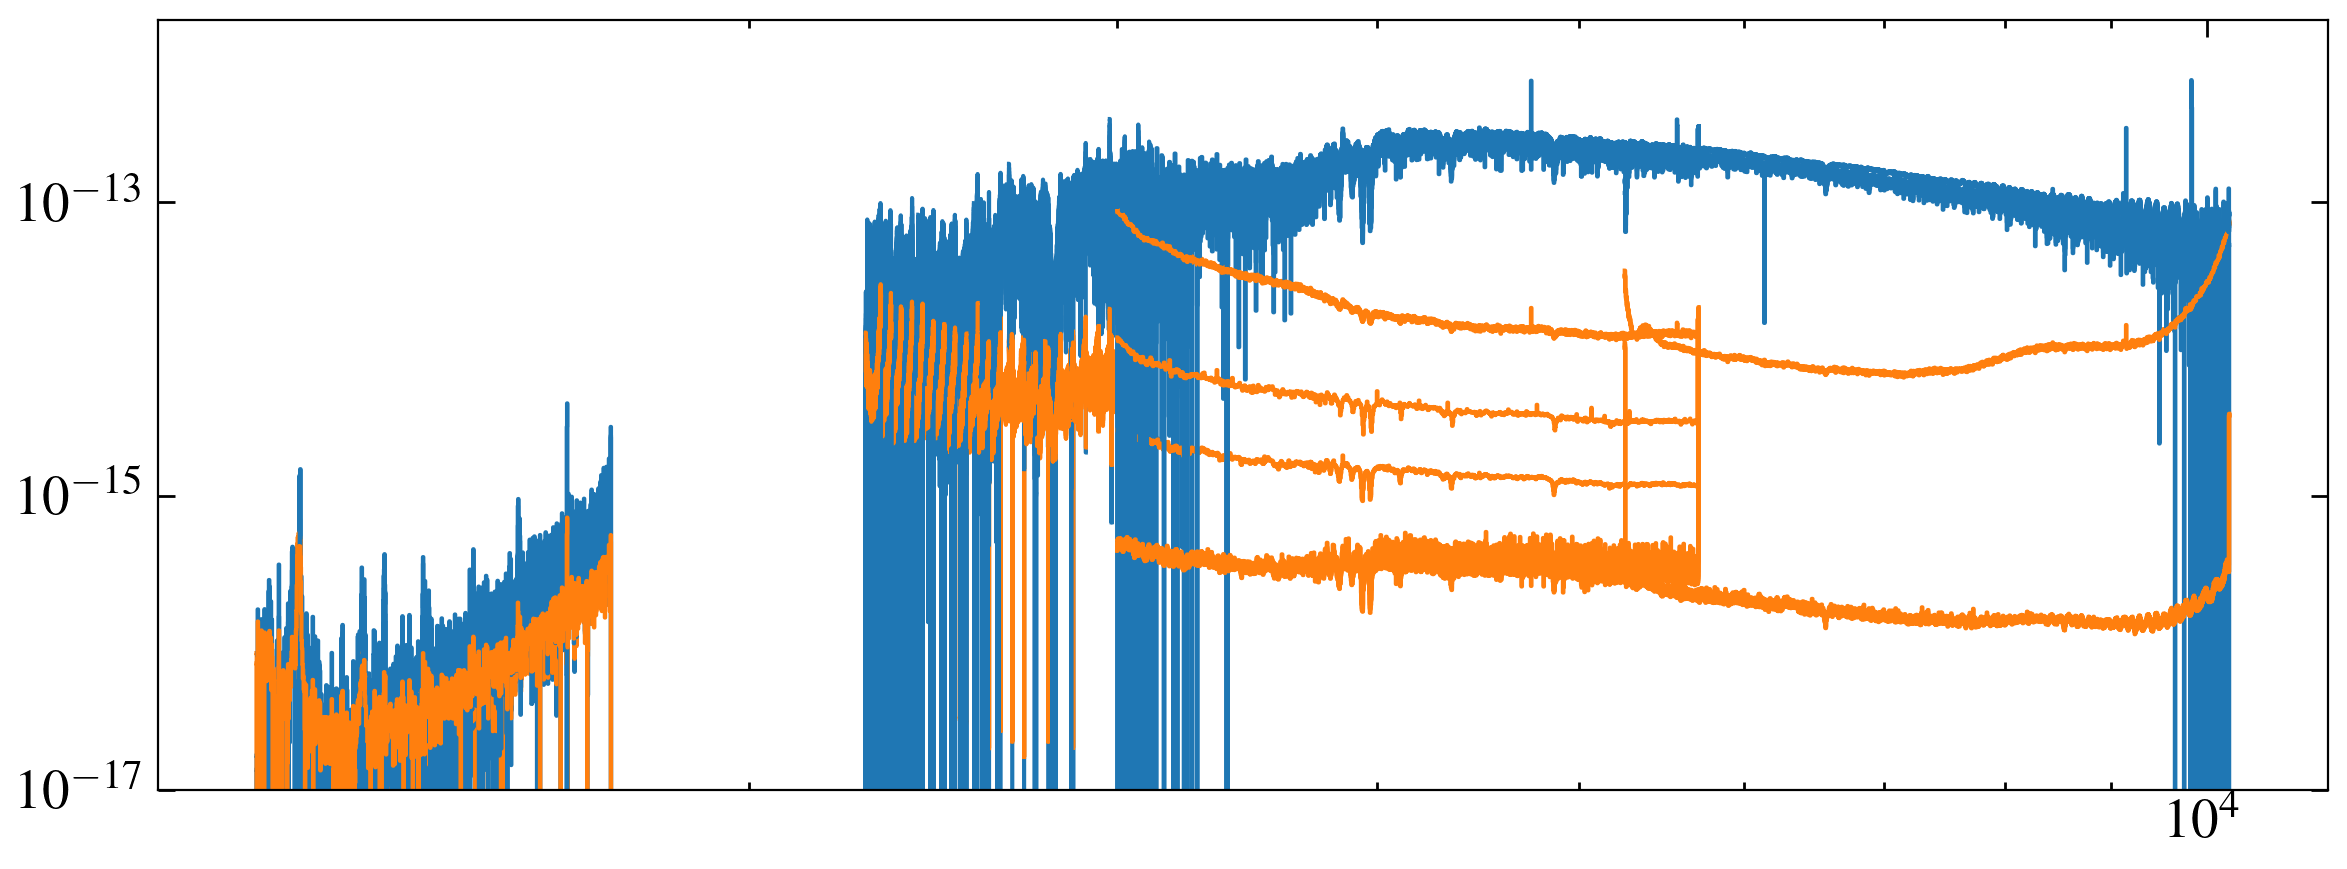

In [3]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        if grating == 'G430L':
            mask = w > 3000
        else:
            mask = w > 1160
        
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1')
    # plt.show()

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)

G140l first, then see what we can build out of the archival spectra

In [4]:
g140l = []
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        g140l.append(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32010_x1d.fits
[96.89902]


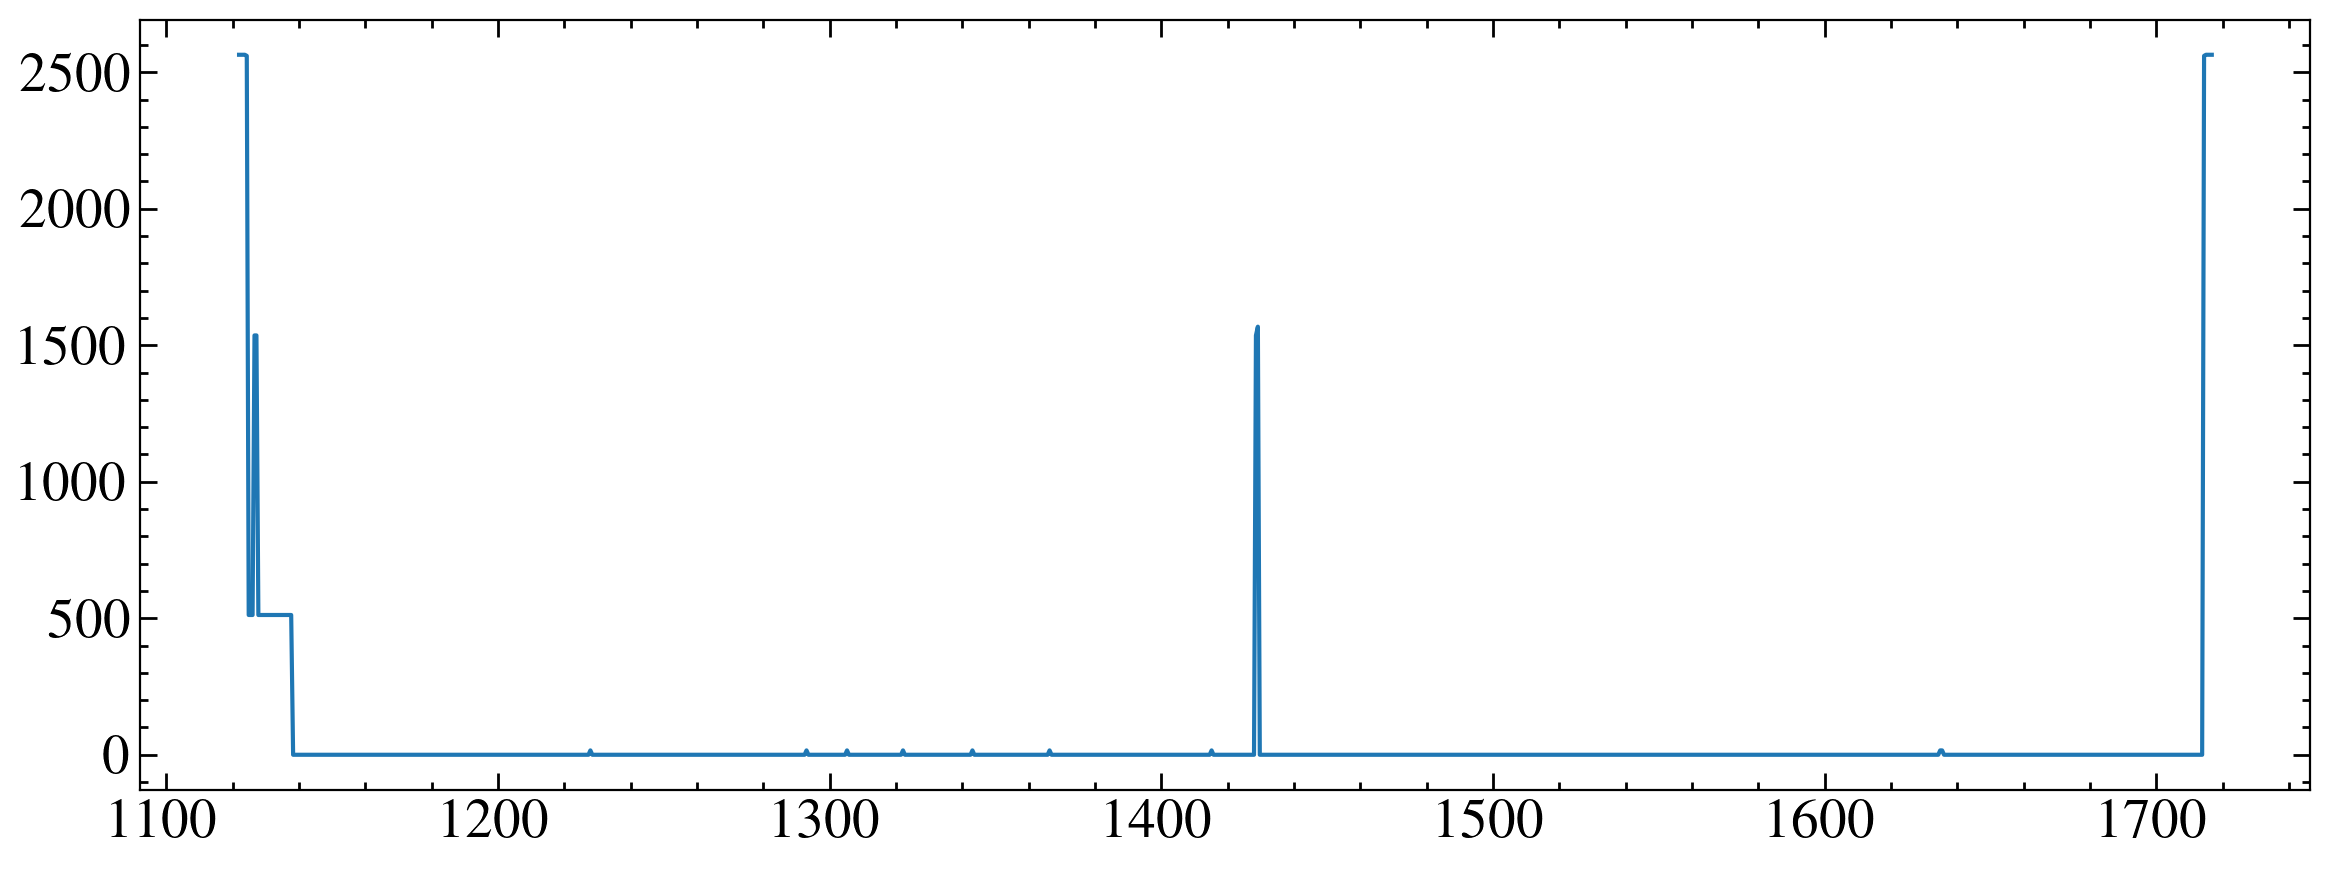

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32020_x1d.fits
[97.24248]


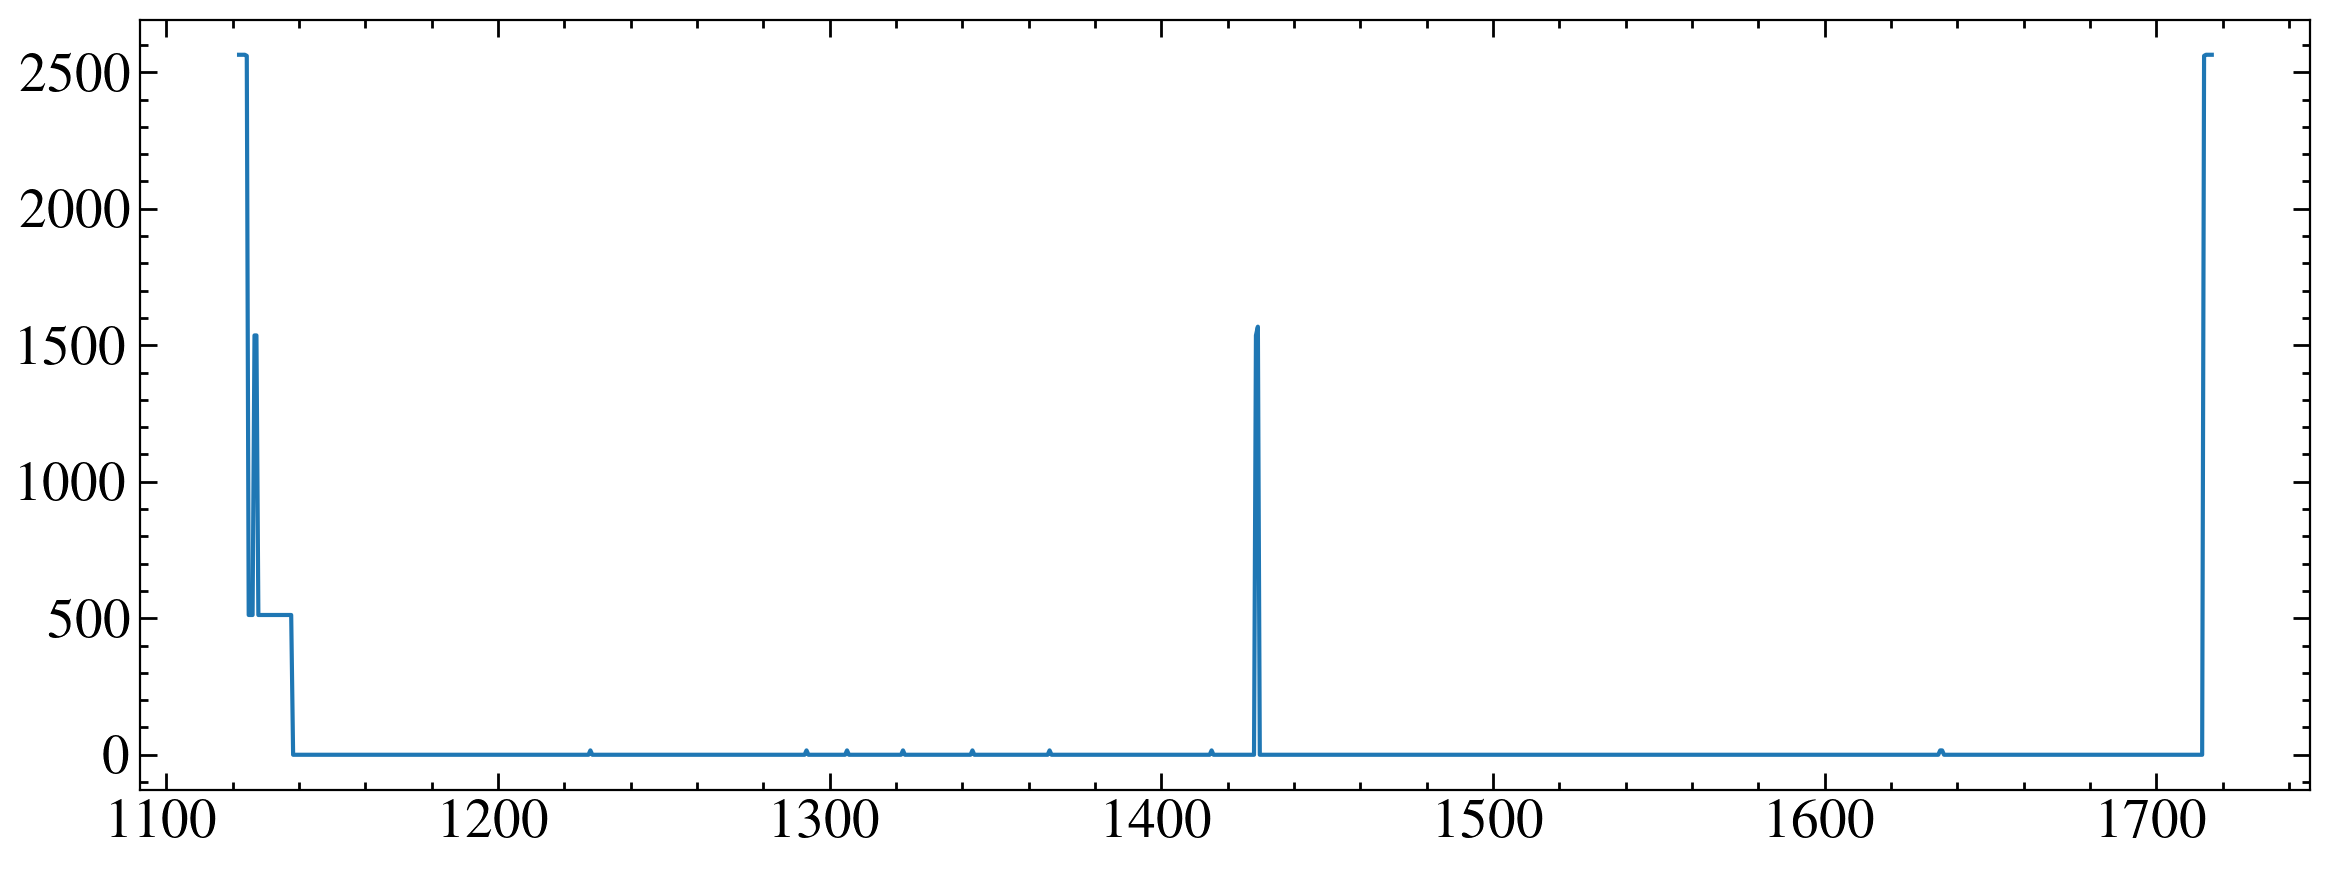

/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/oeoo32030_x1d.fits
[97.10264]


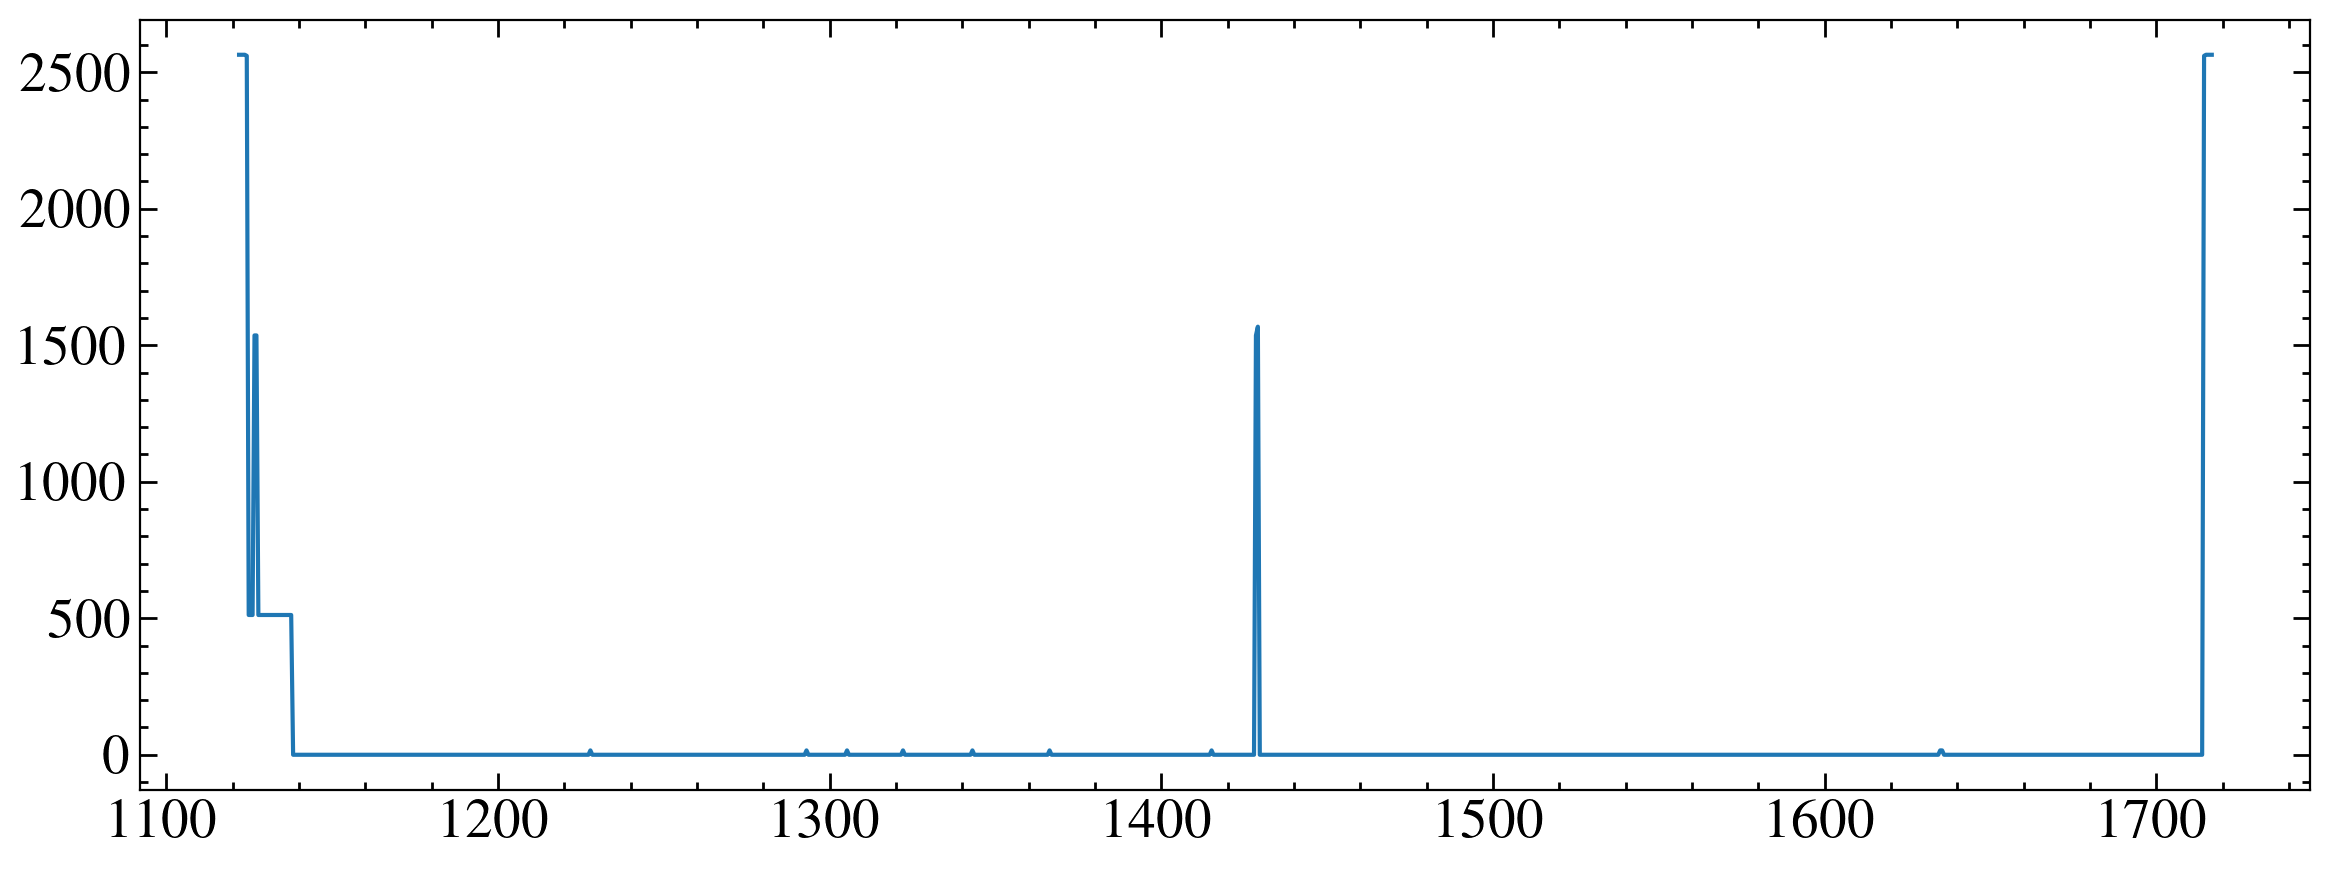

In [5]:
for x in g140l:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    for dt in data:
        w, f, e, dq= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
        if grating == 'G430L':
            mask = w > 3000 
        else:
            mask = (w > 1160) & (dq ==0)
        
        # w, f, e = w[mask], f[mask], e[mask]
        # plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1')
        plt.plot(w, dq)
    plt.show()

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-17)

/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/astropy/stats/funcs.py:702: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]
/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


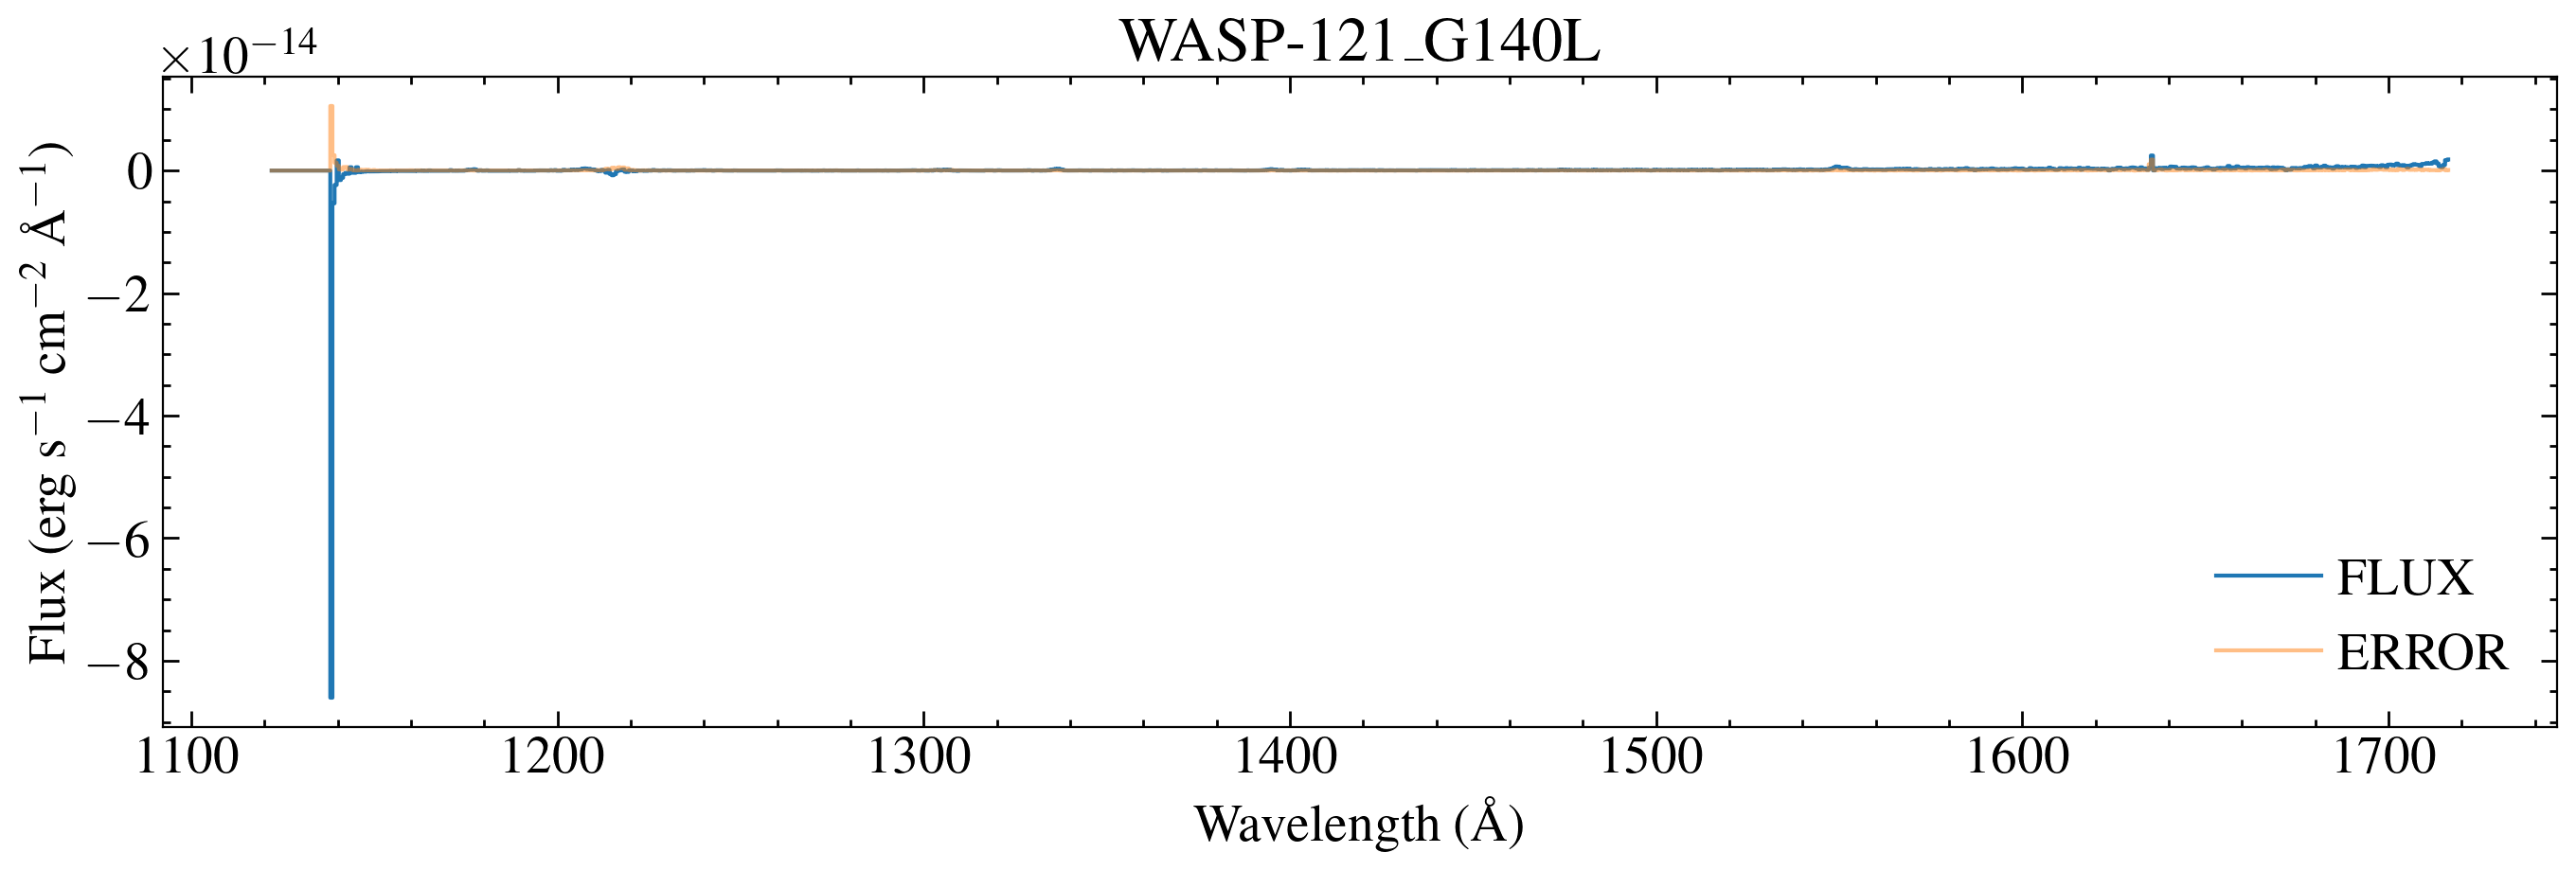

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


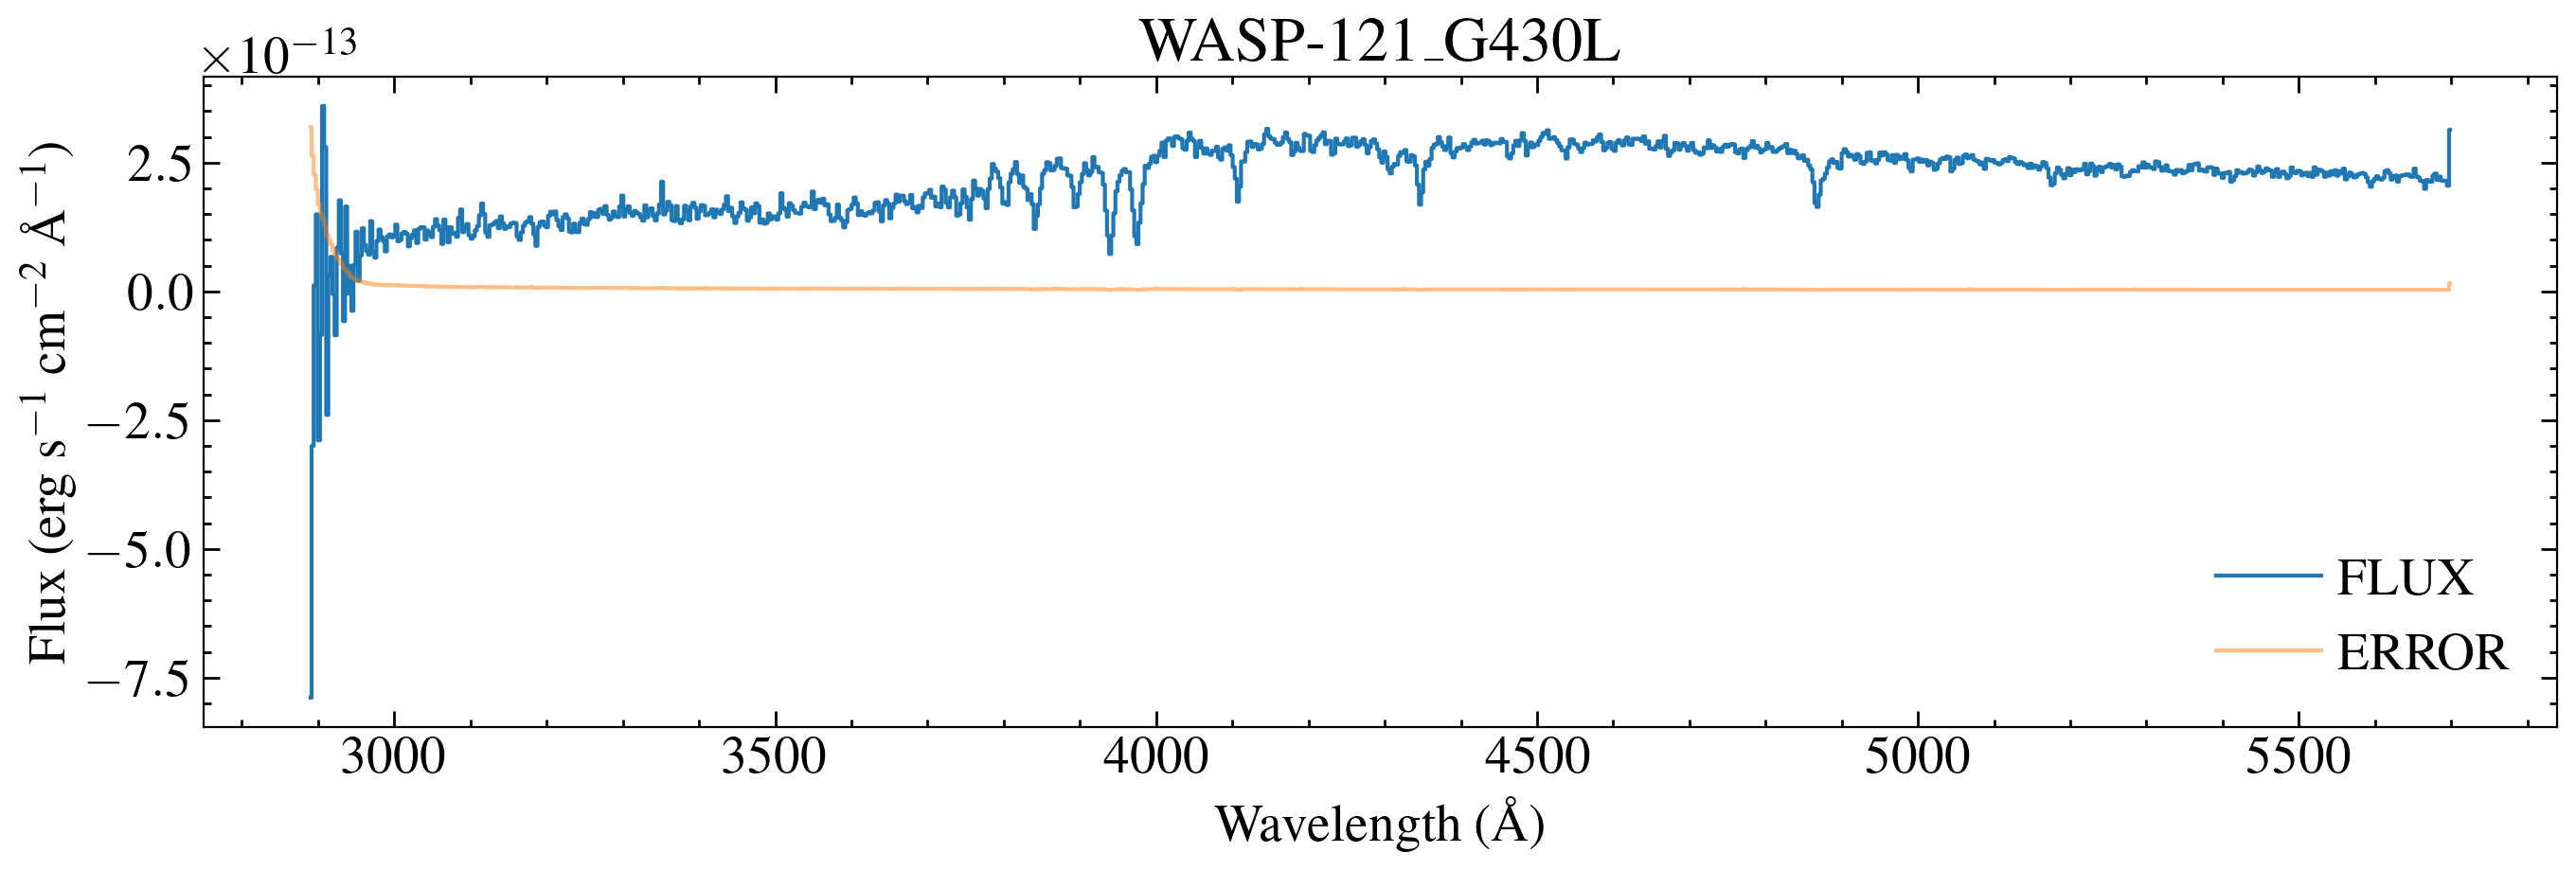

Spectrum saved as hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits


In [6]:
import importlib
import prepare_stis
importlib.reload(prepare_stis)
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/wasp-121/use_x1ds/'
savepath = 'draft_hlsp/wasp-121/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'WASP-121')

In [7]:
g430l = glob.glob('{}oeoo*sx1.fits'.format(path))
# for x in g430l:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     # print(fits.getheader(x, 0)['OPT_ELEM'])
#     data = fits.getdata(x, 1)
#     print(data['A2Center'])
#     # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     for dt in data:
#         w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
#         if grating == 'G430L':
#             mask = w > 3000
#         else:
#             mask = w > 1160
        
#         w, f, e = w[mask], f[mask], e[mask]
#         plt.step(w, f, where='mid', c='C0')
#         plt.step(w, e, where='mid', c='C1')
#     plt.show()


In [8]:
hlsp = glob.glob('draft_hlsp/wasp-121/*')
hlsp

['draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits',
 'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits']

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


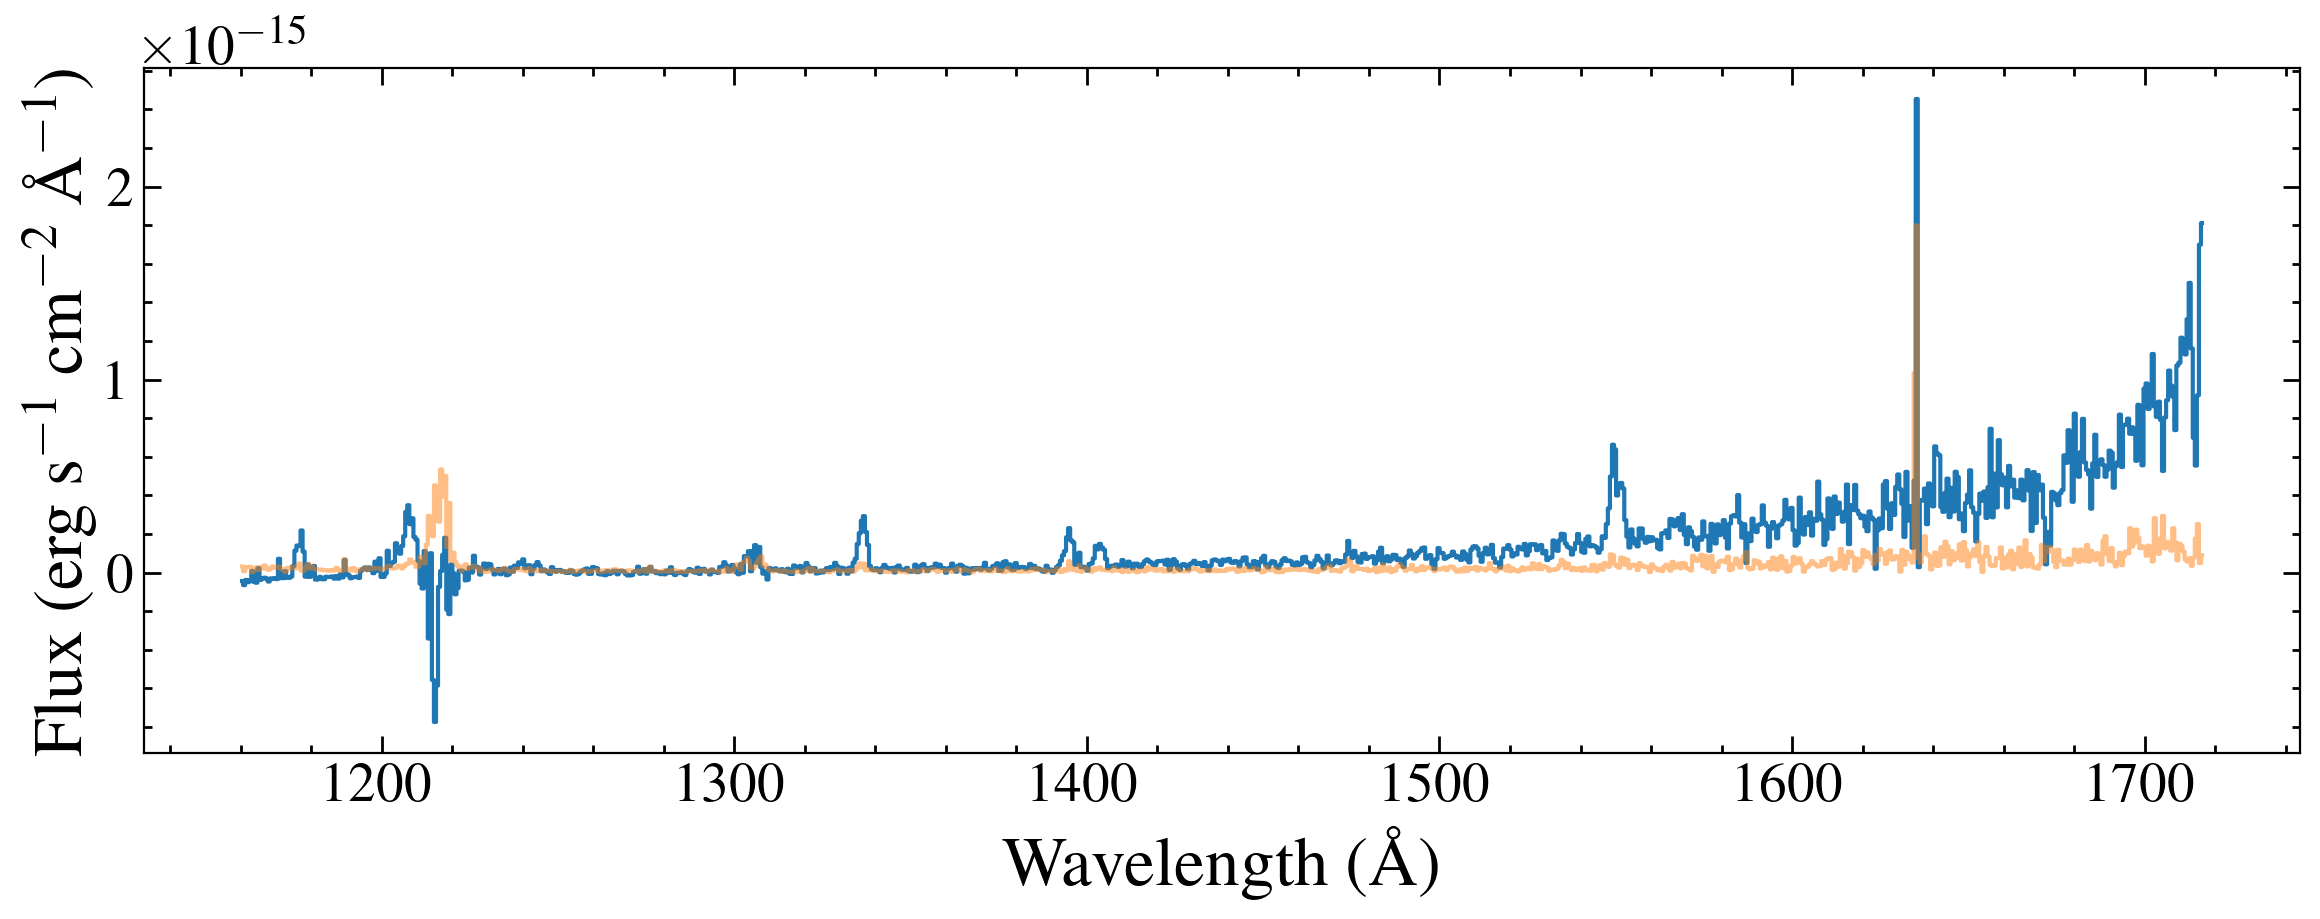

In [9]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

66.0
52X2
1.0
52X2
1.0
52X2
1.0
52X2
1.0
52X2
66.0
52X2
1.0
52X2
1.0
52X2
1.0
52X2
1.0
52X2
2024.0
52X2
2530.0
52X2
2530.0
52X2
2530.0
52X2
2530.0
52X2
2024.0
52X2
2530.0
52X2
2530.0
52X2
2530.0
52X2
2530.0
52X2
10.0
52X0.2
draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits
10.0


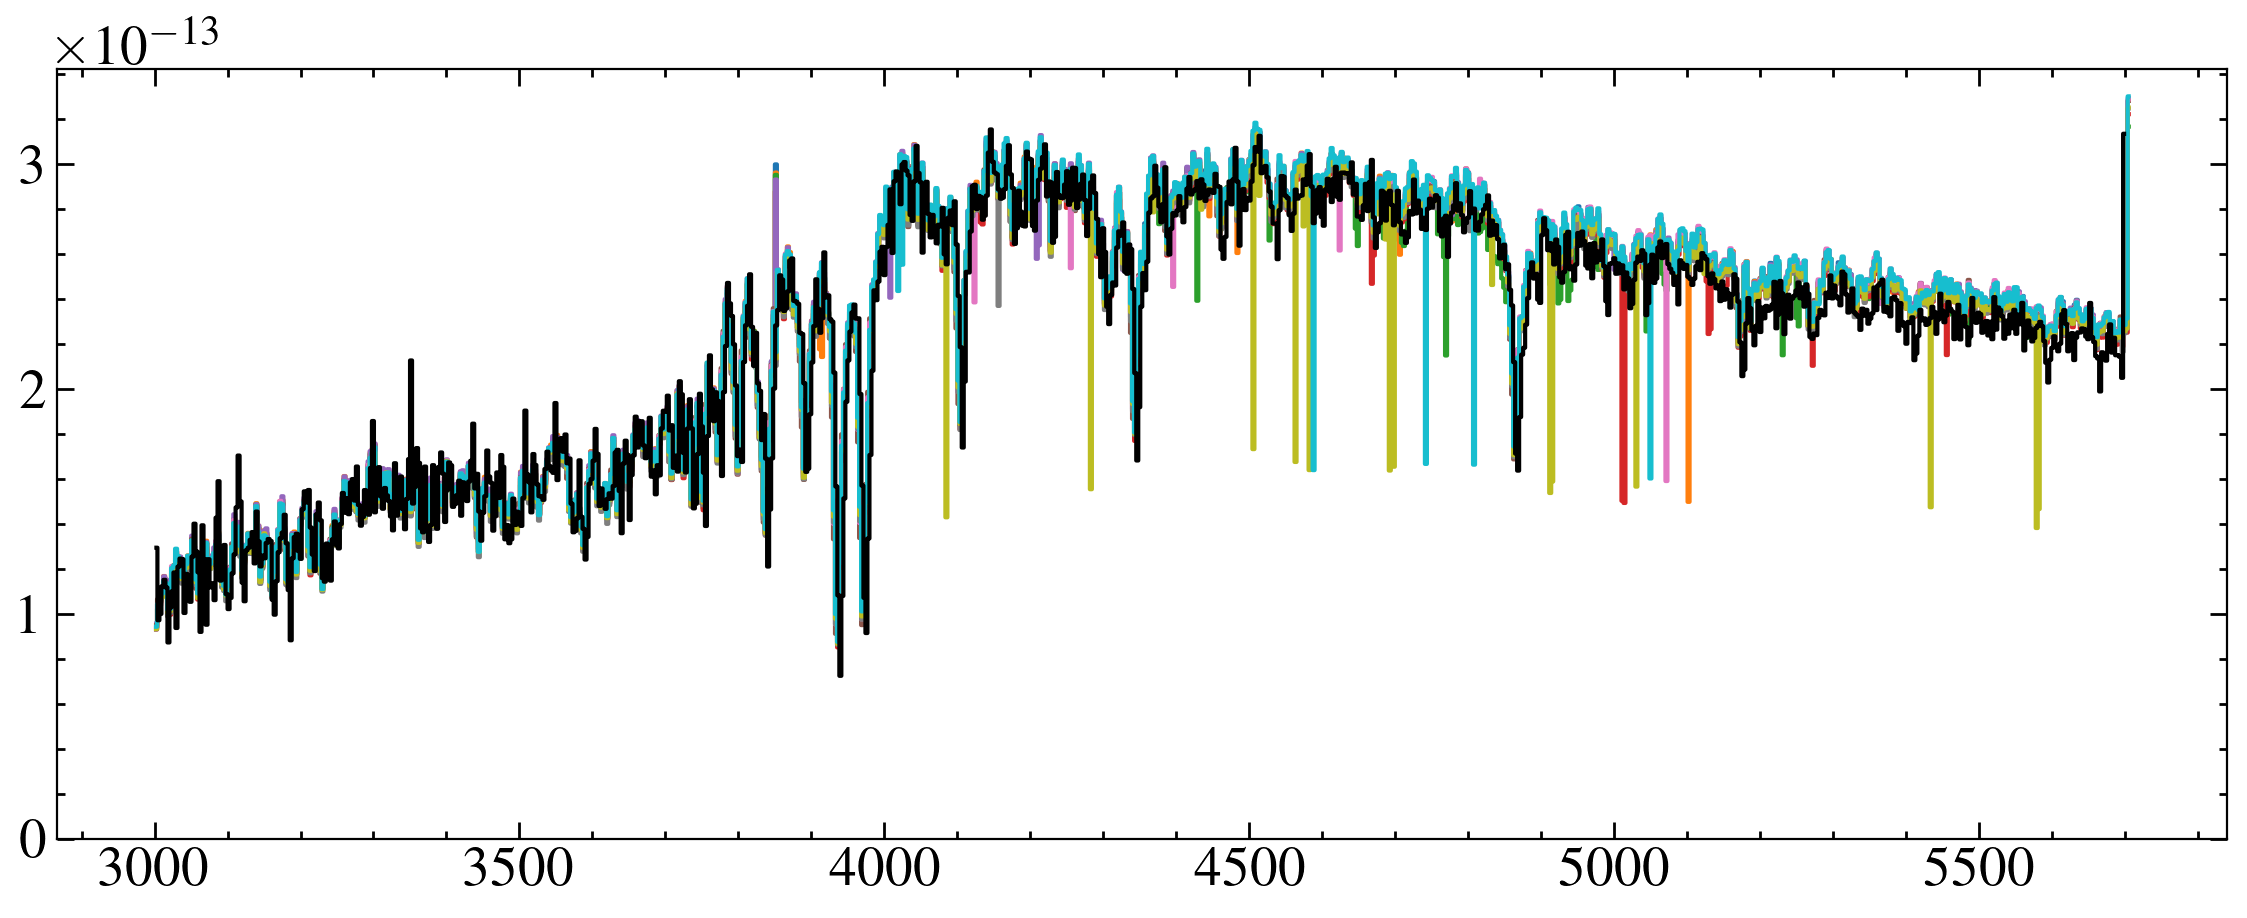

In [10]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating in ['G430L']:#, 'G750L']:
        # print(fits.getheader(x, 0)['OPT_ELEM'])
        data = fits.getdata(x, 1)
        print(fits.getheader(x, 0)['TEXPTIME'])
        print(fits.getheader(x, 0)['APERTURE'])
        if fits.getheader(x, 0)['TEXPTIME'] > 2000:
            # print(data['A2Center'])
            # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
            for dt in data:
                w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
                if grating == 'G430L':
                    mask = w > 3000
                else:
                    mask = w > 1160

                w, f, e = w[mask], f[mask], e[mask]
                plt.step(w, f, where='mid')
                # plt.step(w, e, where='mid', c='C1')
            # plt.show()

        # plt.yscale('log')
        # plt.xscale('log')
plt.ylim(0)

for x in hlsp[0:1]:
    print(x)
    # fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    print(data['EXPTIME'][30])
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='k')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    # plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    # plt.xlabel('Wavelength (\AA)', size=25)
    # plt.tight_layout()
    plt.show()

In [11]:
fits.getheader(x, 0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G430L   '                                                            
APERTURE= '52X0.2  '                                                            
TARGNAME= 'WASP-121'                                                            
RA_TARG =       107.6002227084                                                  
DEC_TARG=      -39.09721845808                                                  
PROPOSID=                16701                                                  
HLSPNAME= 'MUSCLES Extension

In [12]:
x

'draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g430l_v1_component-spec.fits'

draft_hlsp/wasp-121/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits


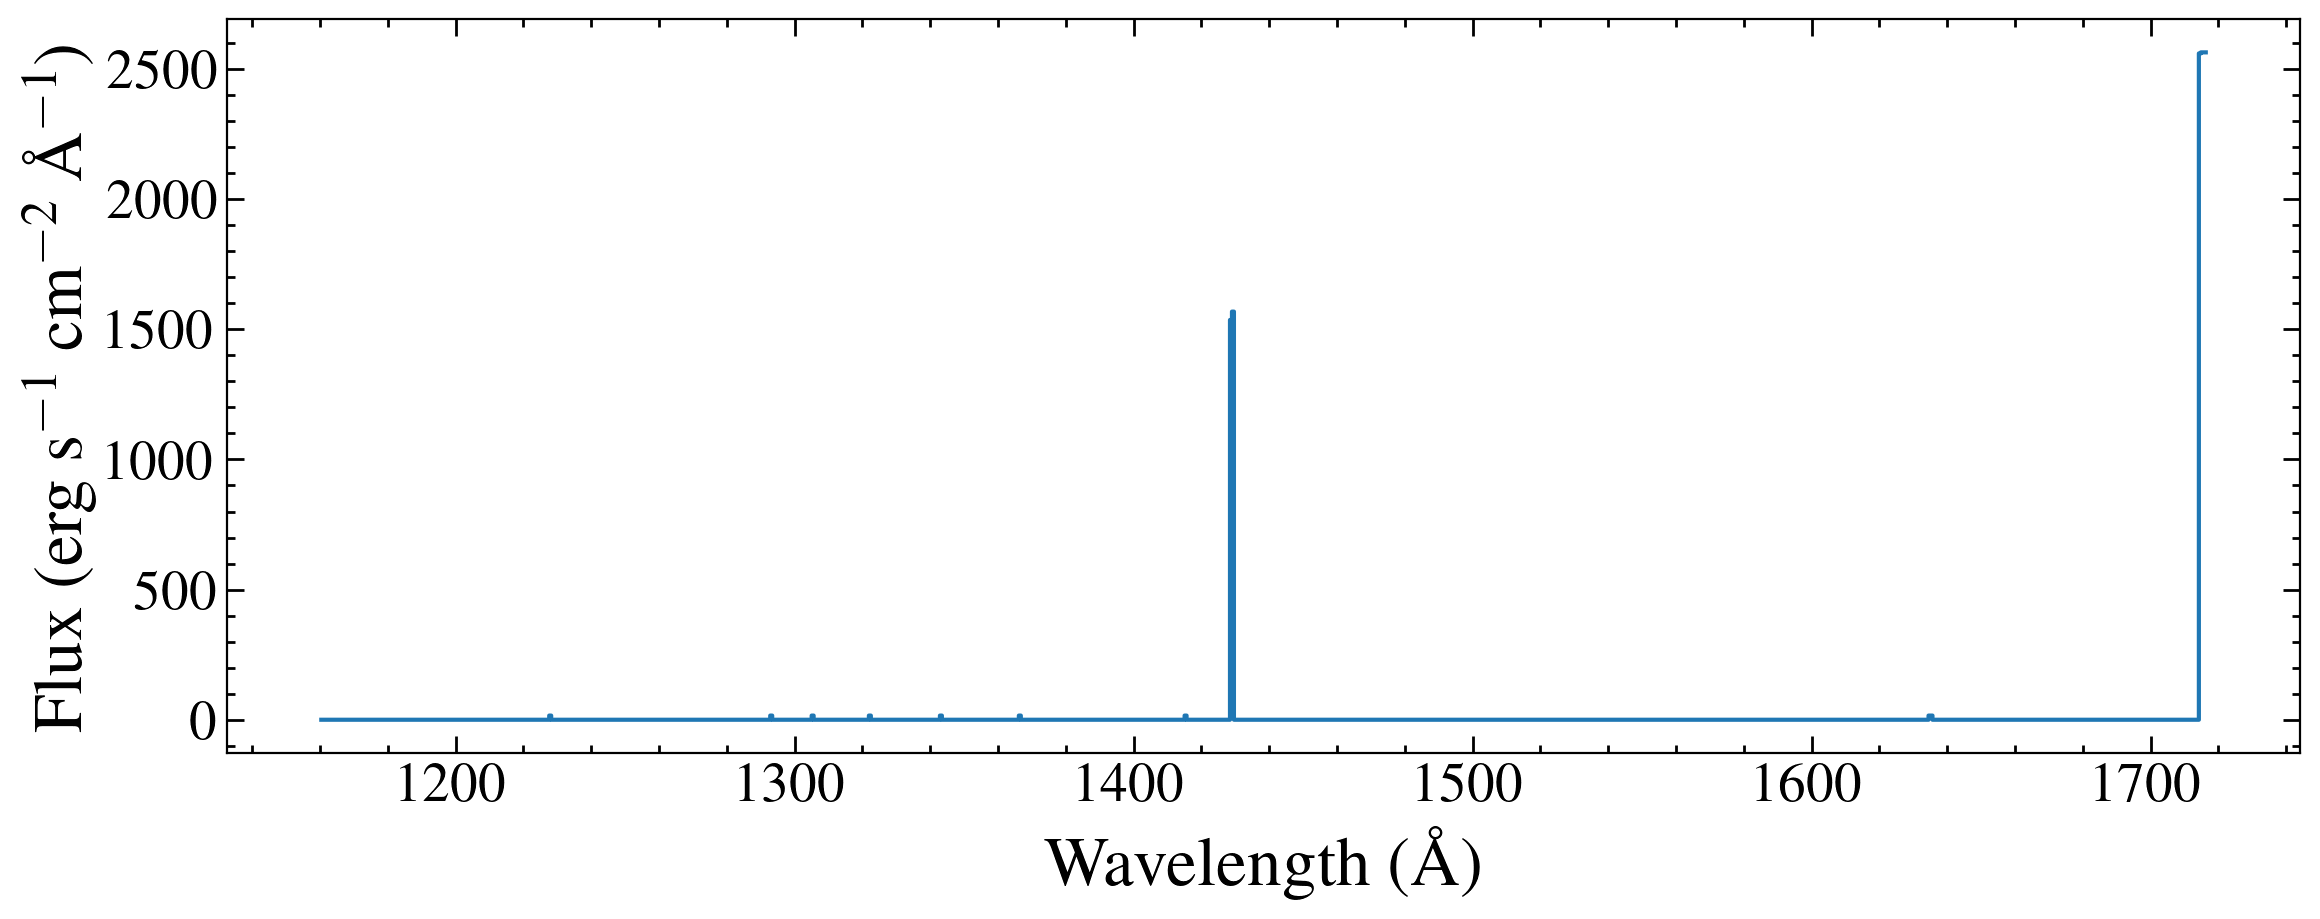

In [16]:
for x in hlsp[1:]:
    print(x)
    fig, ax = plt.subplots(figsize=(12, 5))
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'],data['DQ']
   
    if grating == 'G430L':
        mask = w > 3000
    else:
        mask = w > 1160

    w, f, e, dq = w[mask], f[mask], e[mask], dq[mask]
    # plt.step(w, f, where='mid', c='C0')
    # plt.step(w, e, where='mid', c='C1', alpha=0.5)
    plt.step(w, dq, where='mid')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.show()
    

In [17]:
dq

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   16,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   